> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-deep')
%config InlineBackend.figure_format = 'retina'
pd.set_option('float_format', '{:f}'.format)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data=pd.read_csv('tmdb-movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
data.shape

(10866, 21)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing duplicates, replacing NaNs, and changing datatypes)

In [11]:
data.drop(columns=['homepage','cast','production_companies','tagline','imdb_id','overview',
                   'budget_adj','keywords','revenue_adj','vote_count']
                    ,inplace=True)

In [12]:
sum(data.duplicated())

1

In [13]:
data.drop_duplicates()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.500000,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.100000,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.300000,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.500000,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.300000,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,7.200000,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,5.800000,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,7.600000,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,6.500000,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,8.000000,2015


In [14]:
for i in data.columns:
    if data[i].isna().any(): 
        data[i].replace(np.NaN,"",inplace=True)

In [15]:
data['release_date']=pd.to_datetime(data['release_date'],format='%m/%d/%y')

In [16]:
data['profit']=data['revenue']-data['budget']
data['profit_levels']=pd.cut(data['profit'],bins=[-4.139124e+08,0.000000e+00,2.544506e+09],labels=['Loss','Profit'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
release_date      10866 non-null datetime64[ns]
vote_average      10866 non-null float64
release_year      10866 non-null int64
profit            10866 non-null int64
profit_levels     10865 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Number of movies released over years)

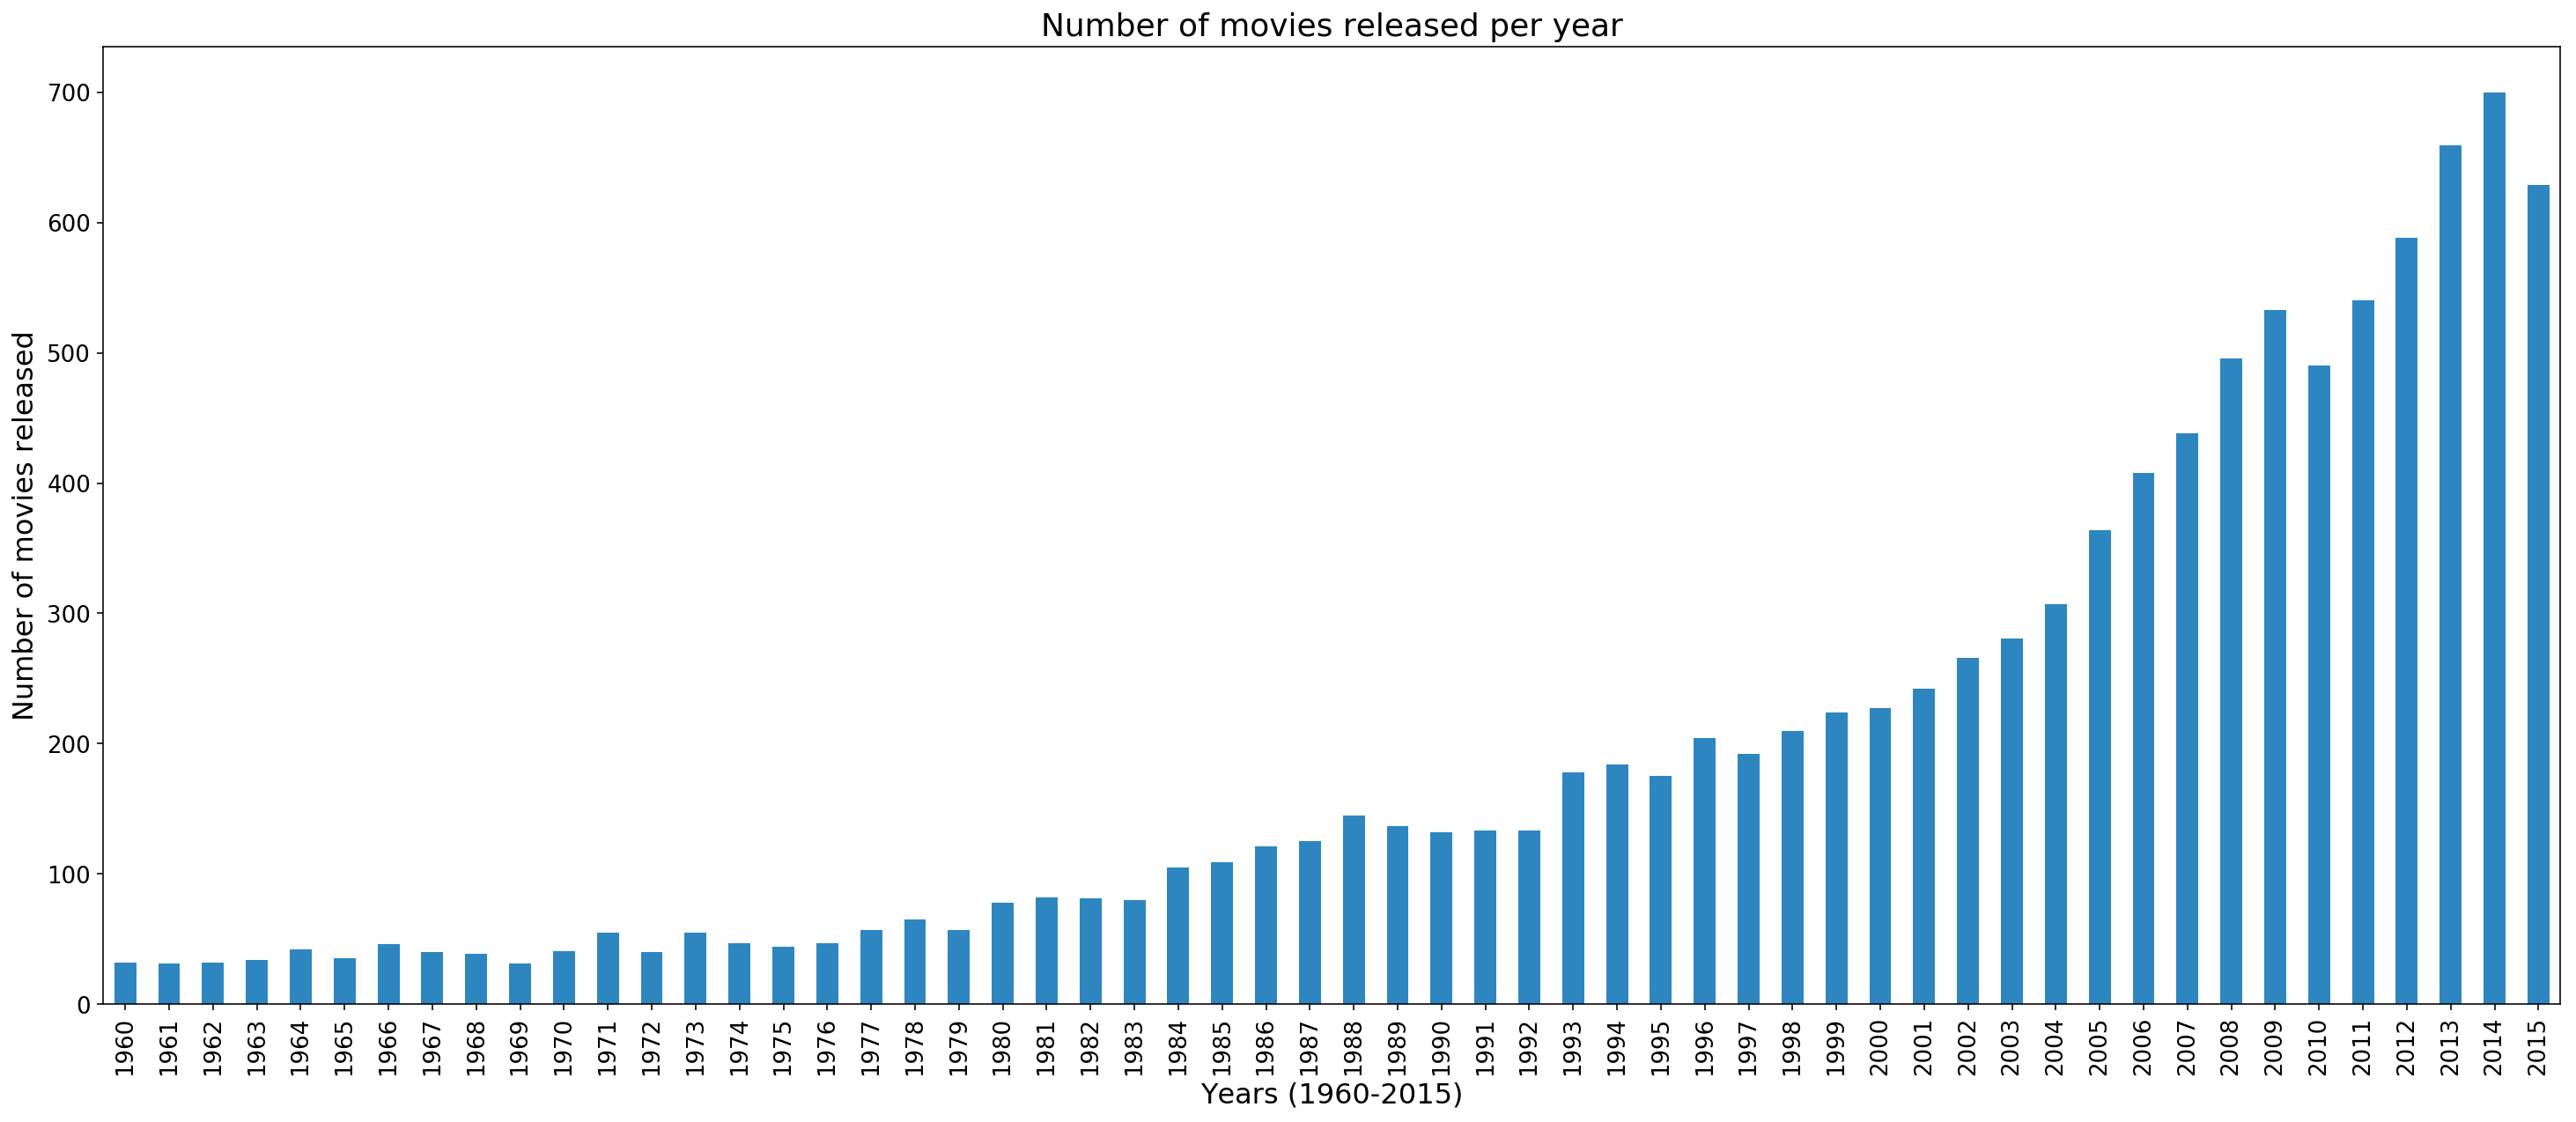

In [18]:
fig, ax = plt.subplots(figsize=(25,10))
data.groupby('release_year').count()['id'].plot(kind='bar',fontsize=13,color="#2E86C1")
plt.title("Number of movies released per year", fontsize=18)
plt.xlabel("Years (1960-2015)", fontsize=16)
plt.ylabel("Number of movies released", fontsize=16)
plt.show()

### Research Question 2  (Which genre is released most?)

Text(0.5, 0, 'Number of movies')

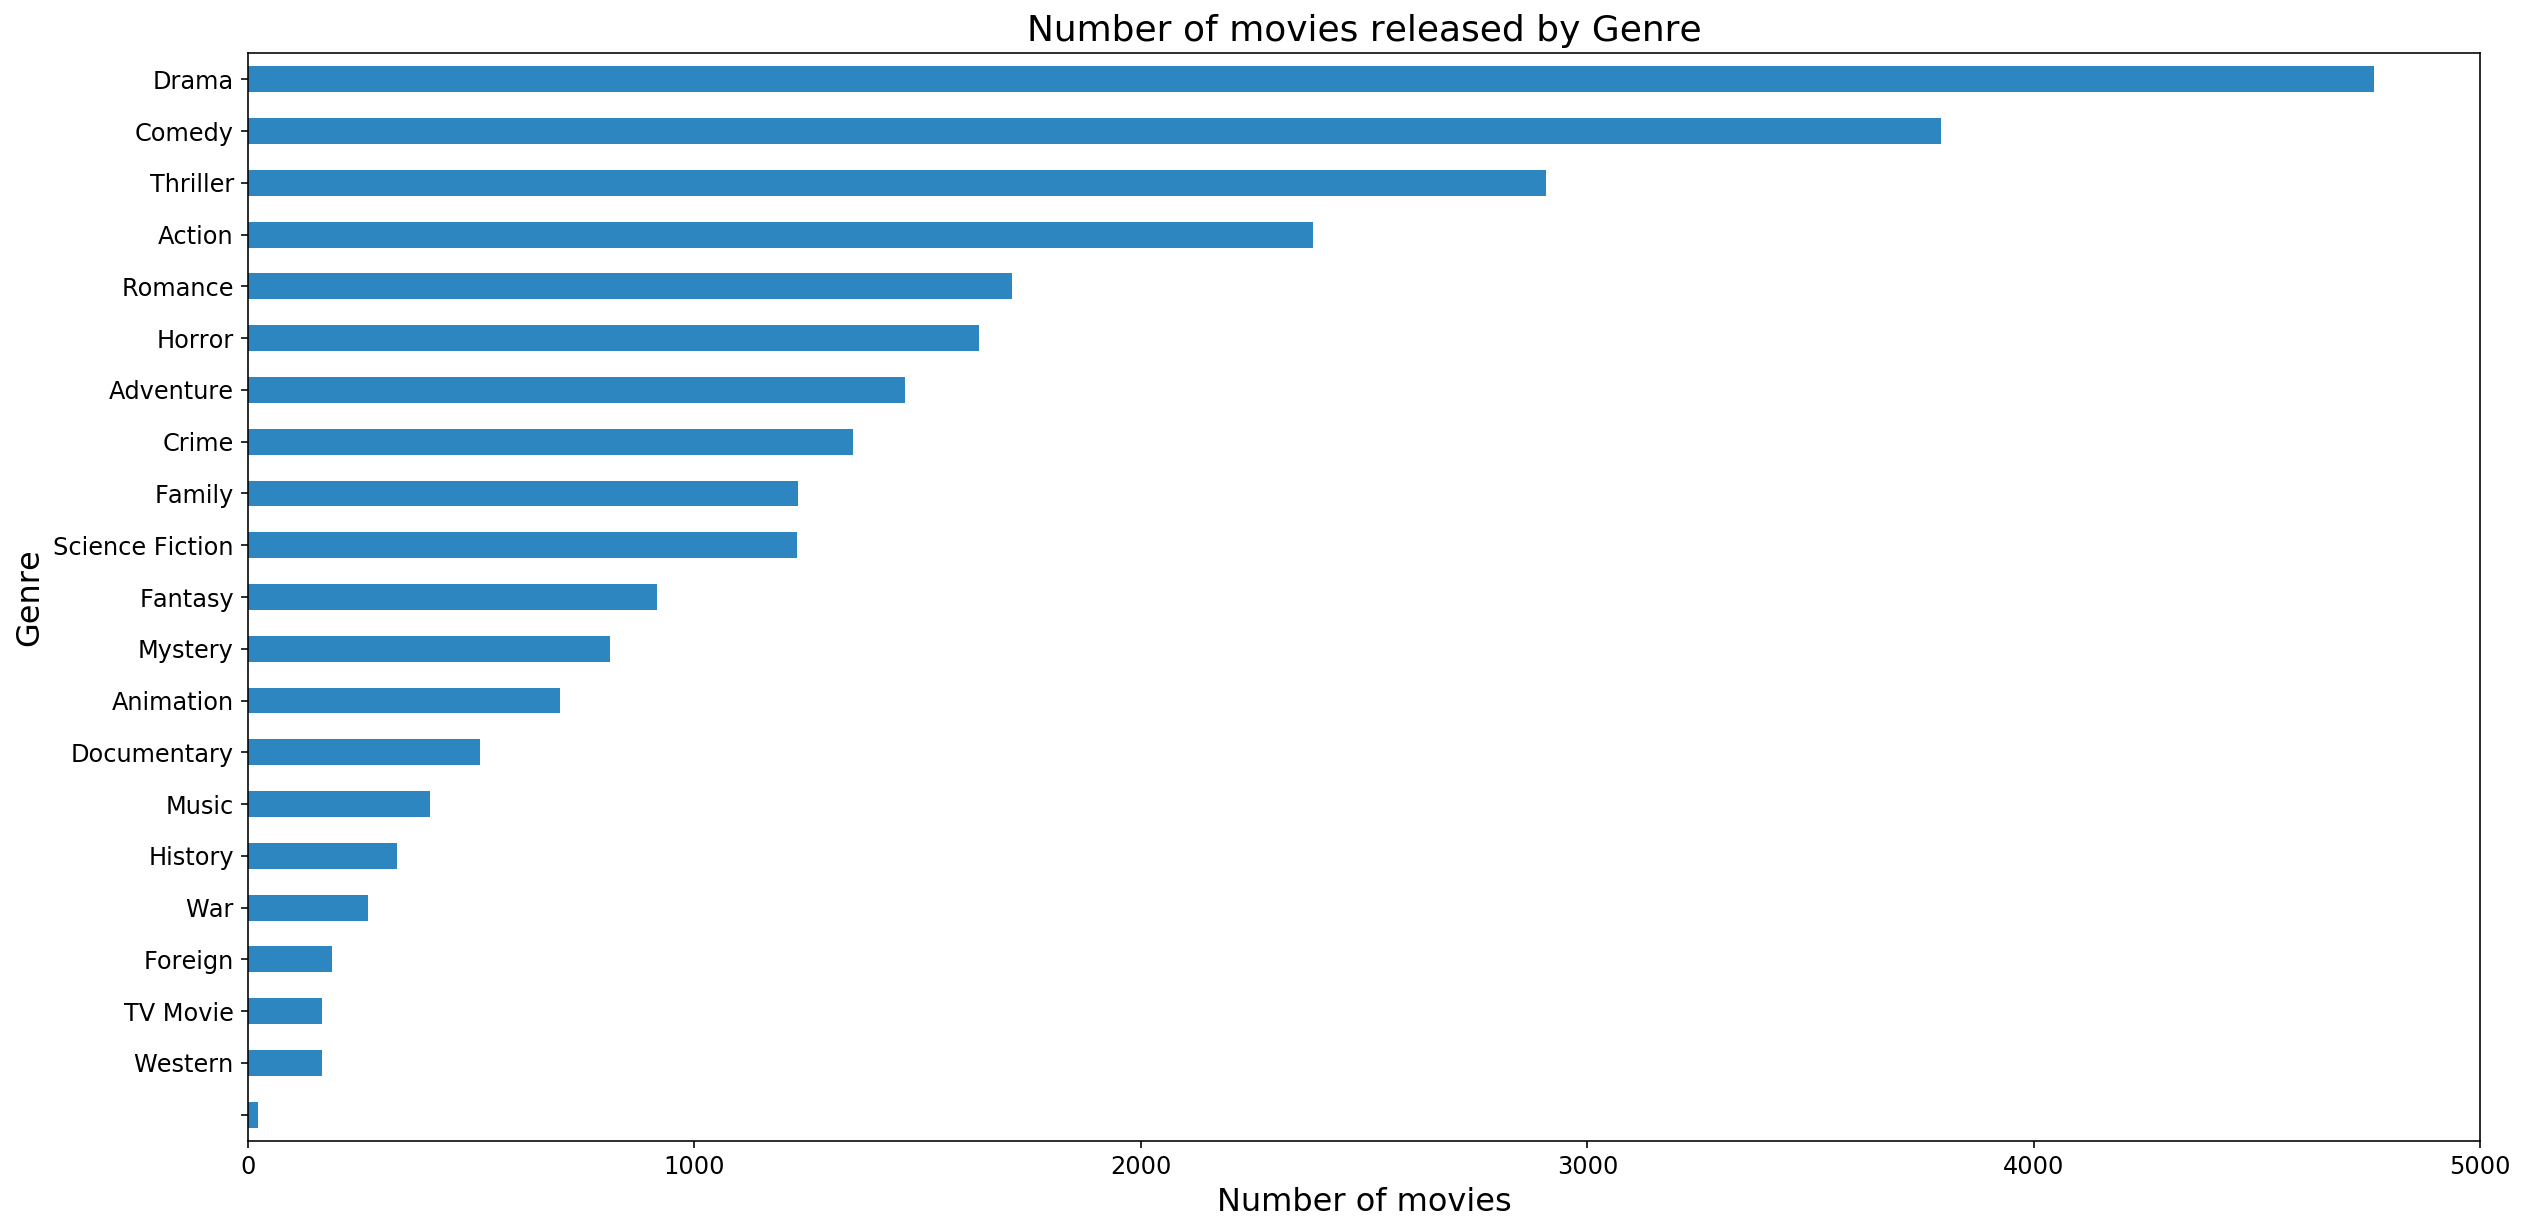

In [19]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
Genre=pd.Series(data['genres'].str.cat(sep = '|').split("|"))
Genre.value_counts(ascending=True).plot(kind="barh",figsize=(20,10), fontsize=12,color="#2E86C1")


plt.title("Number of movies released by Genre", fontsize=18)
plt.ylabel("Genre", fontsize=16)
plt.xlabel("Number of movies", fontsize=16)

### Research Question 3  (Most profitable years)

In [20]:
data.groupby('release_year').sum()['profit'].sort_values(ascending=False)[0:5]

release_year
2015    19165902961
2014    16407160045
2012    16394344772
2013    15467594656
2011    14677437926
Name: profit, dtype: int64

Text(0.5, 1.0, 'Profit over years (2010-2015)')

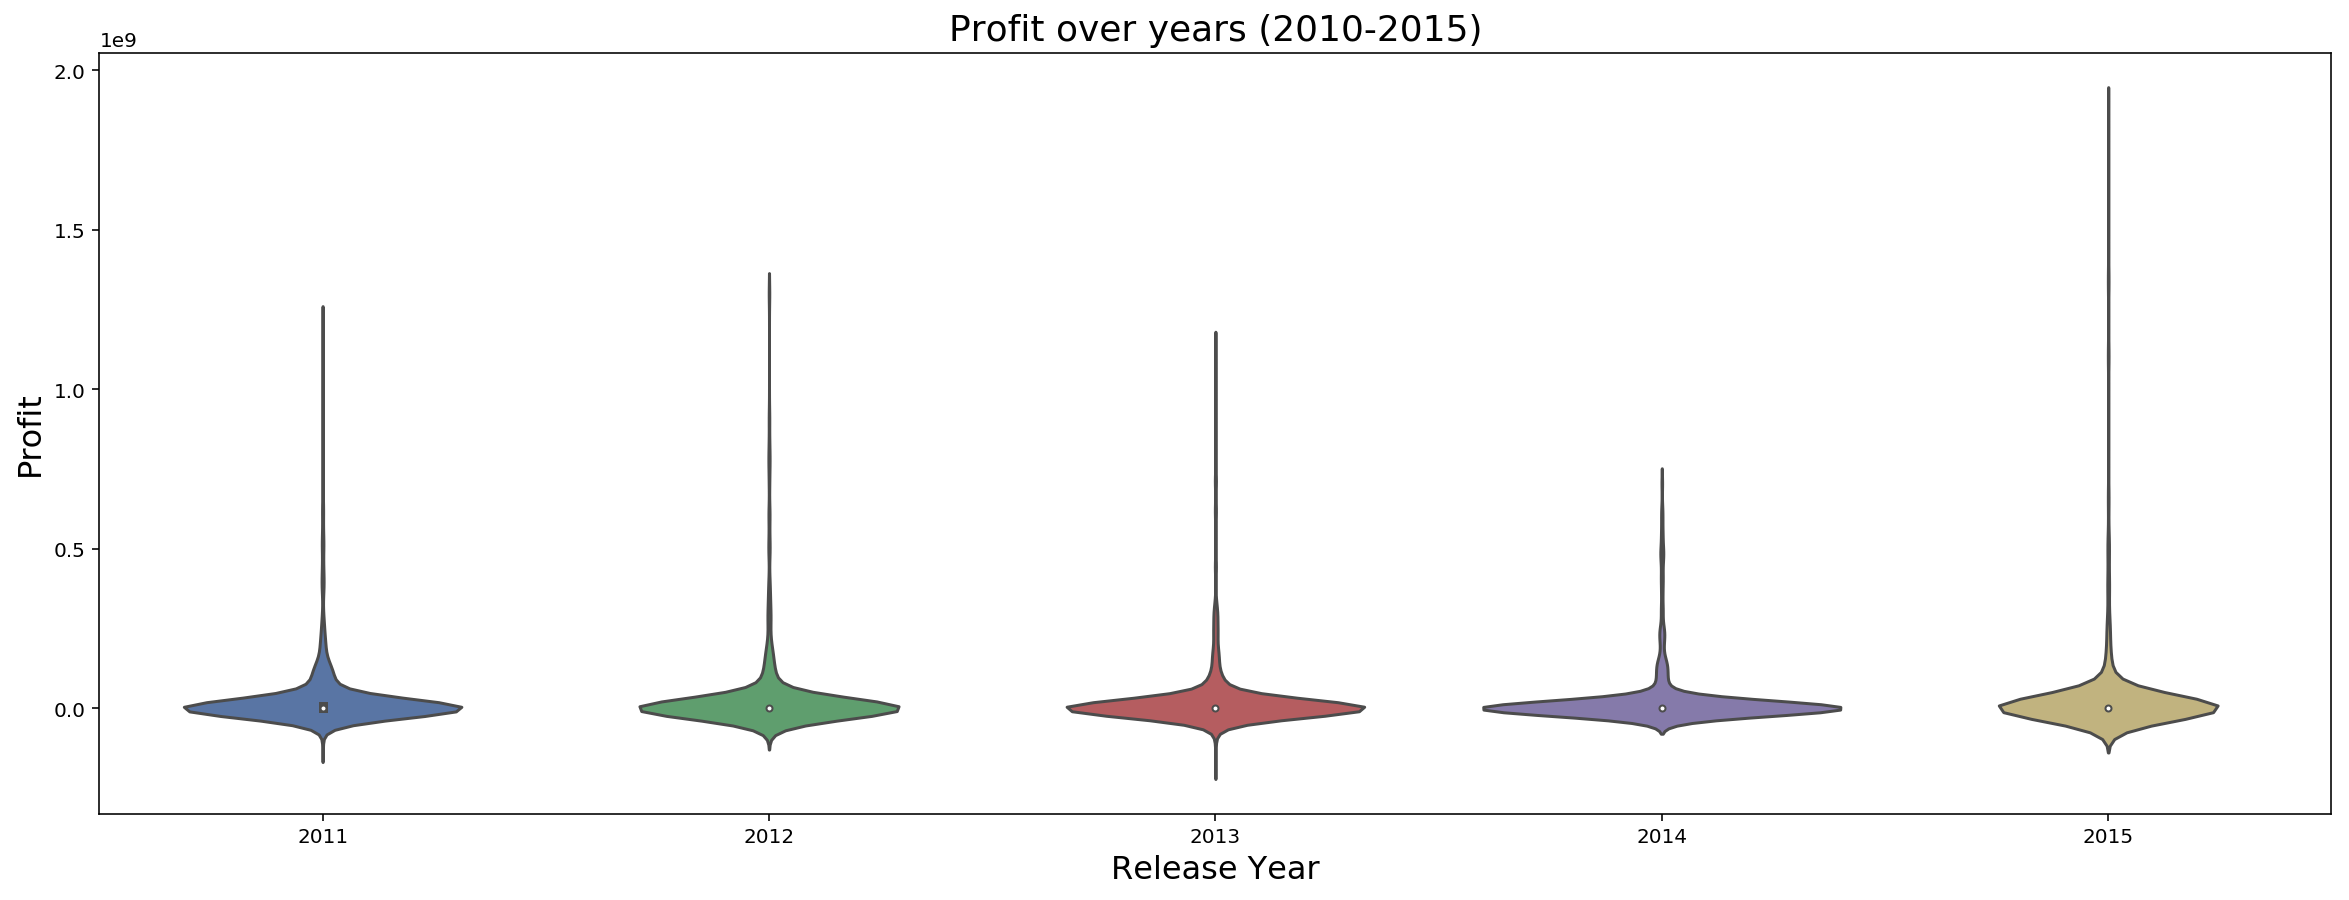

In [21]:
movies_profit=data[(data['revenue']>0) & (data['budget']>0)][['original_title','profit']]
plt.figure(figsize=(20,7))
movies_over_2010=data[data['release_year']>2010]
sns.violinplot(movies_over_2010['release_year'],movies_over_2010['profit'])
plt.ylabel("Profit",fontsize=16)
plt.xlabel("Release Year",fontsize=16)
plt.title("Profit over years (2010-2015)",fontsize=18)

### Research Question 4  (Average Runtime of movies in profit and loss during 2010-2015 period)

In [22]:
movies_over_2010.groupby(['release_year','profit_levels']).mean()['runtime']

release_year  profit_levels
2011          Loss             94.662953
              Profit          104.386740
2012          Loss             94.737470
              Profit          105.988166
2013          Loss             91.236559
              Profit          107.567010
2014          Loss             95.023256
              Profit          107.608696
2015          Loss             91.895556
              Profit          107.636872
Name: runtime, dtype: float64

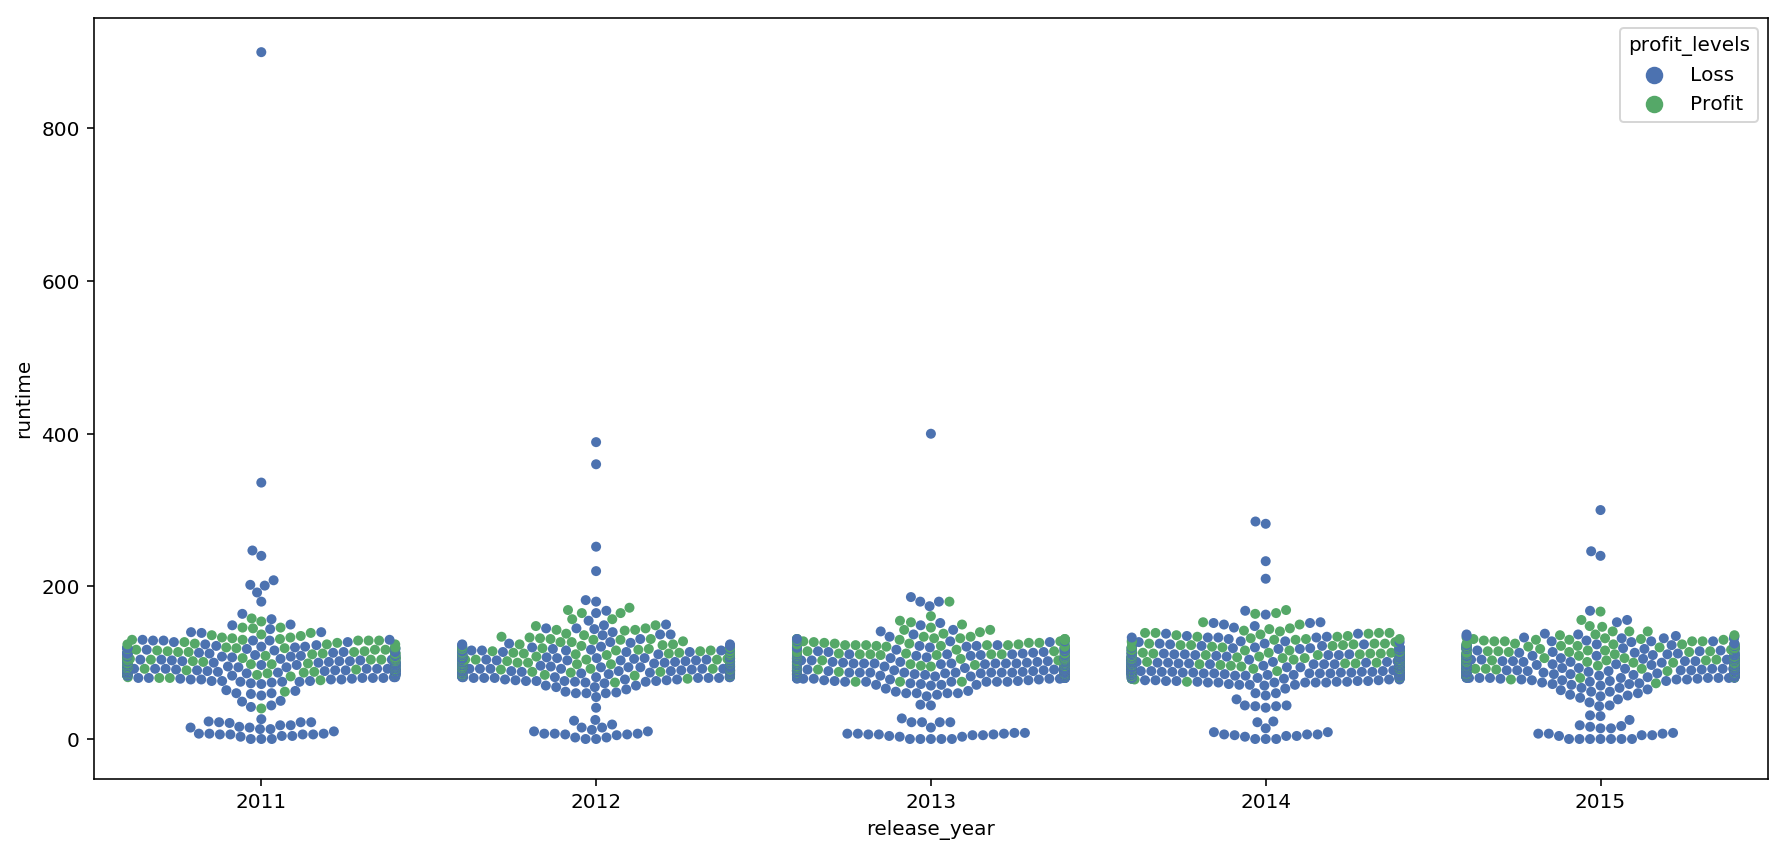

In [23]:
plt.figure(figsize=(15,7))
sns.swarmplot(movies_over_2010['release_year'],movies_over_2010['runtime'],hue=movies_over_2010['profit_levels'])

### Research Question 5 (How much does it cost averagely to make a movie?)

In [24]:
data['runtime'].describe()
runtime_bins=[0,90,120,150,180,900]
data['runtime_levels']=pd.cut(data['runtime'],labels=['0-90','90-120','120-150','150-180','180+'],bins=runtime_bins)
print("Mean budget of movies", data['budget'].mean())
data.groupby('runtime_levels').mean()['budget']


Mean budget of movies 14625701.09414688


runtime_levels
0-90       5330528.201296
90-120    14239155.501739
120-150   34762917.771221
150-180   39254211.209302
180+      14047155.039062
Name: budget, dtype: float64

Text(0.5, 1.0, 'Averege Budget of a movie according to their run time')

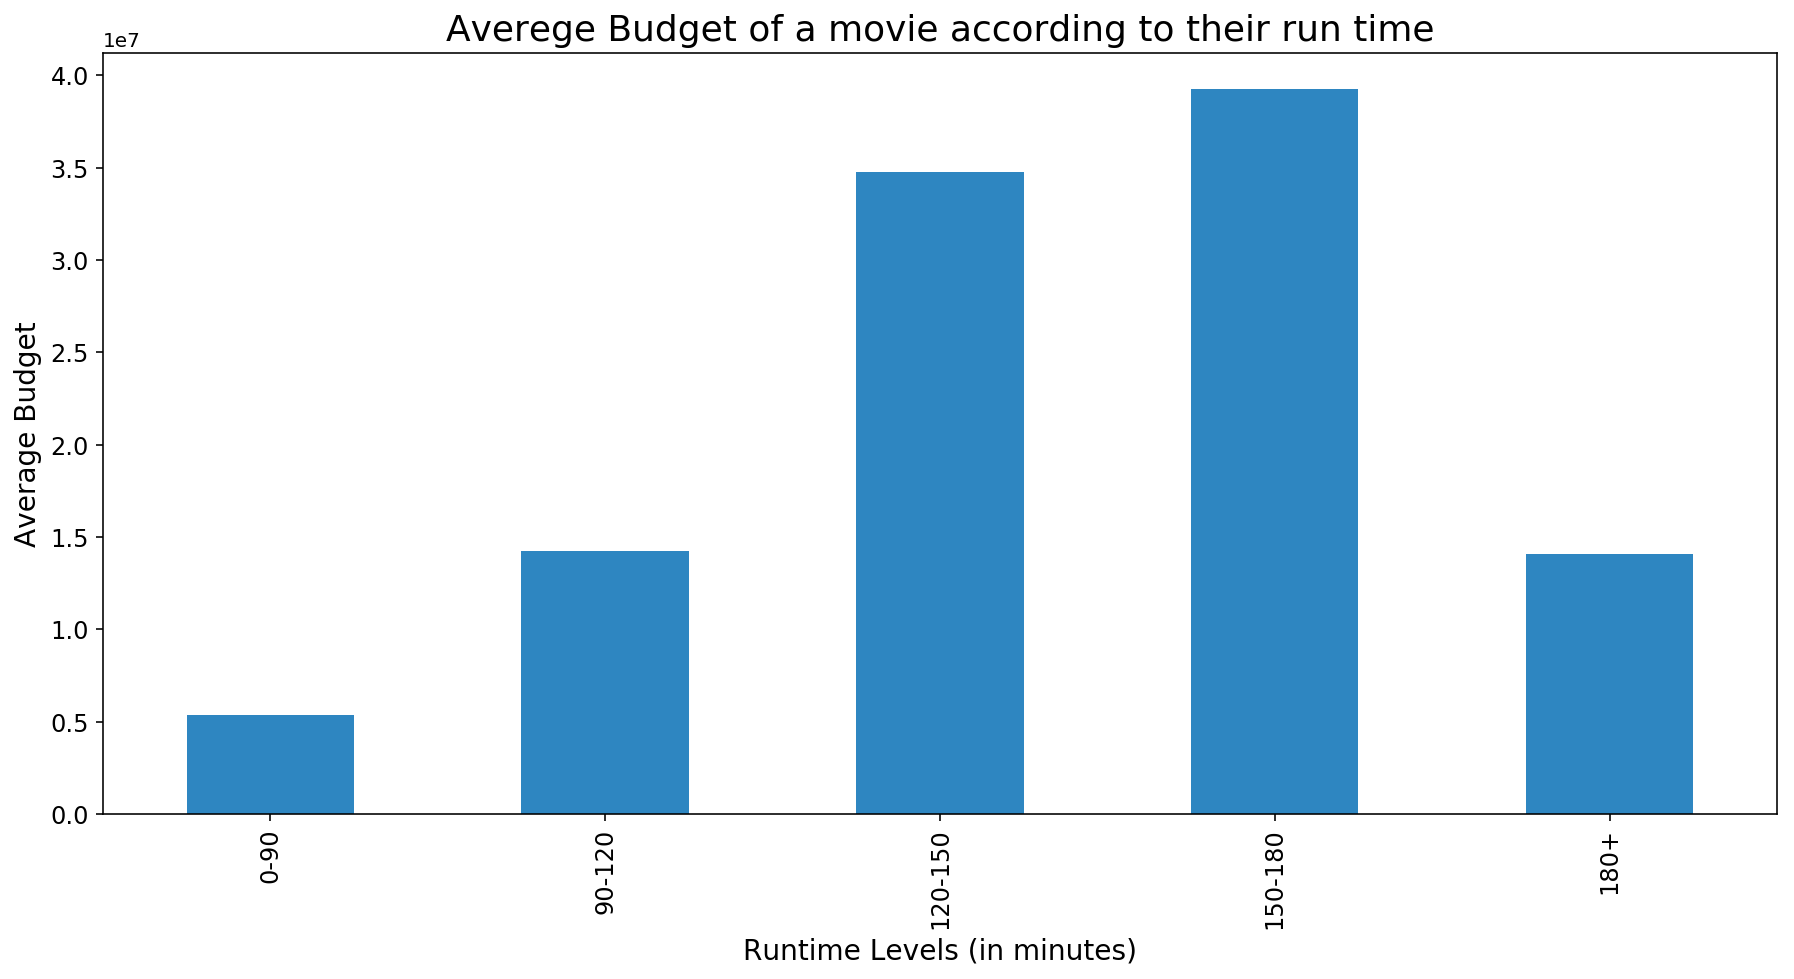

In [25]:
plt.figure(figsize=(15,7))
data.groupby('runtime_levels').mean()['budget'].plot(kind='bar',color="#2E86C1",fontsize=12)
plt.xlabel("Runtime Levels (in minutes)",fontsize=14)
plt.ylabel("Average Budget",fontsize=14)
plt.title("Averege Budget of a movie according to their run time",fontsize=18)

<a id='conclusions'></a>
## Conclusions
Conclusions
After analyzing the dataset, I came to the following conclusions:
1. Most movies got released in 2014. Since 1960, the trendline of the number of movies released shows a positive curve.
2. Directors love makes "Drama" films. Most movies released lie in the "Drama" genre.
3. 2015 was the most profitable year for the film industry.
4. Most profitable years were from 2011 to 2015 and movies making a profit was over 100 minutes while movies in the loss were only around 90 minutes long.
5. Surprisingly, 120–150 minute long movies had more than double the budget of 90–120 minute long movies. But, the longest movies over 180+ minutes had a budget lower than the average budget.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])